In [1]:
from marsvision.pipeline.Model import Model
from marsvision.pipeline.SlidingWindow import SlidingWindow
from marsvision.utilities.DataUtility import DataUtility
import cv2
import numpy as np
import pandas as pd

In [2]:
# Working with an sklearn  model and the sliding window module
data_utility = DataUtility()
data_utility.data_reader()
input_images = np.array(data_utility.images)
model = Model("model.p", model_type="sklearn")
sliding_window = SlidingWindow(model, "marsvision.db", 16, 16, 16, 16)
sliding_window.sliding_window_predict(input_images, "marsface.jpg")

c:\users\dpale\desktop\projects\marsvision\marsvision\pipeline\Model.py:56: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.config = yaml.load(yaml_cfg)


IndexError: list index out of range

In [2]:
# Run sliding window pipeline with a pytorch model.
data_utility = DataUtility()
data_utility.data_reader()
input_images = np.array(data_utility.images)
input_filenames = data_utility.file_names
model = Model("alexnet_deepmars3-25.pt", model_type="pytorch")
sliding_window = SlidingWindow(model, "marsvision.db", 75, 75, 75, 75)
sliding_window.sliding_window_predict(input_images, input_filenames)

c:\users\dpale\desktop\projects\marsvision\marsvision\pipeline\Model.py:56: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.config = yaml.load(yaml_cfg)


In [3]:
input_images.shape

(1, 4078, 2048, 3)

In [4]:
# Executing and returning a sqlite statement
import sqlite3

# Connect to the database
conn = sqlite3.connect("marsvision.db")
c = conn.cursor()
c.execute("SELECT id FROM global ORDER BY id DESC LIMIT 1")

In [5]:
global_df = pd.read_sql("SELECT * FROM global", conn)
global_df

,id,filename,stride_length_x,stride_length_y,window_length,window_height
0,1,PIA24470_fig1.jpg,75,75,75,75


In [6]:
window_df = pd.read_sql("SELECT * FROM windows", conn)
window_df

,prediction,coord_x,coord_y,global_id
0,6,0,0,1
1,6,75,0,1
2,6,150,0,1
3,6,225,0,1
4,6,300,0,1
...,...,...,...,...
1535,6,1725,4050,1
1536,6,1800,4050,1
1537,6,1875,4050,1
1538,6,1950,4050,1


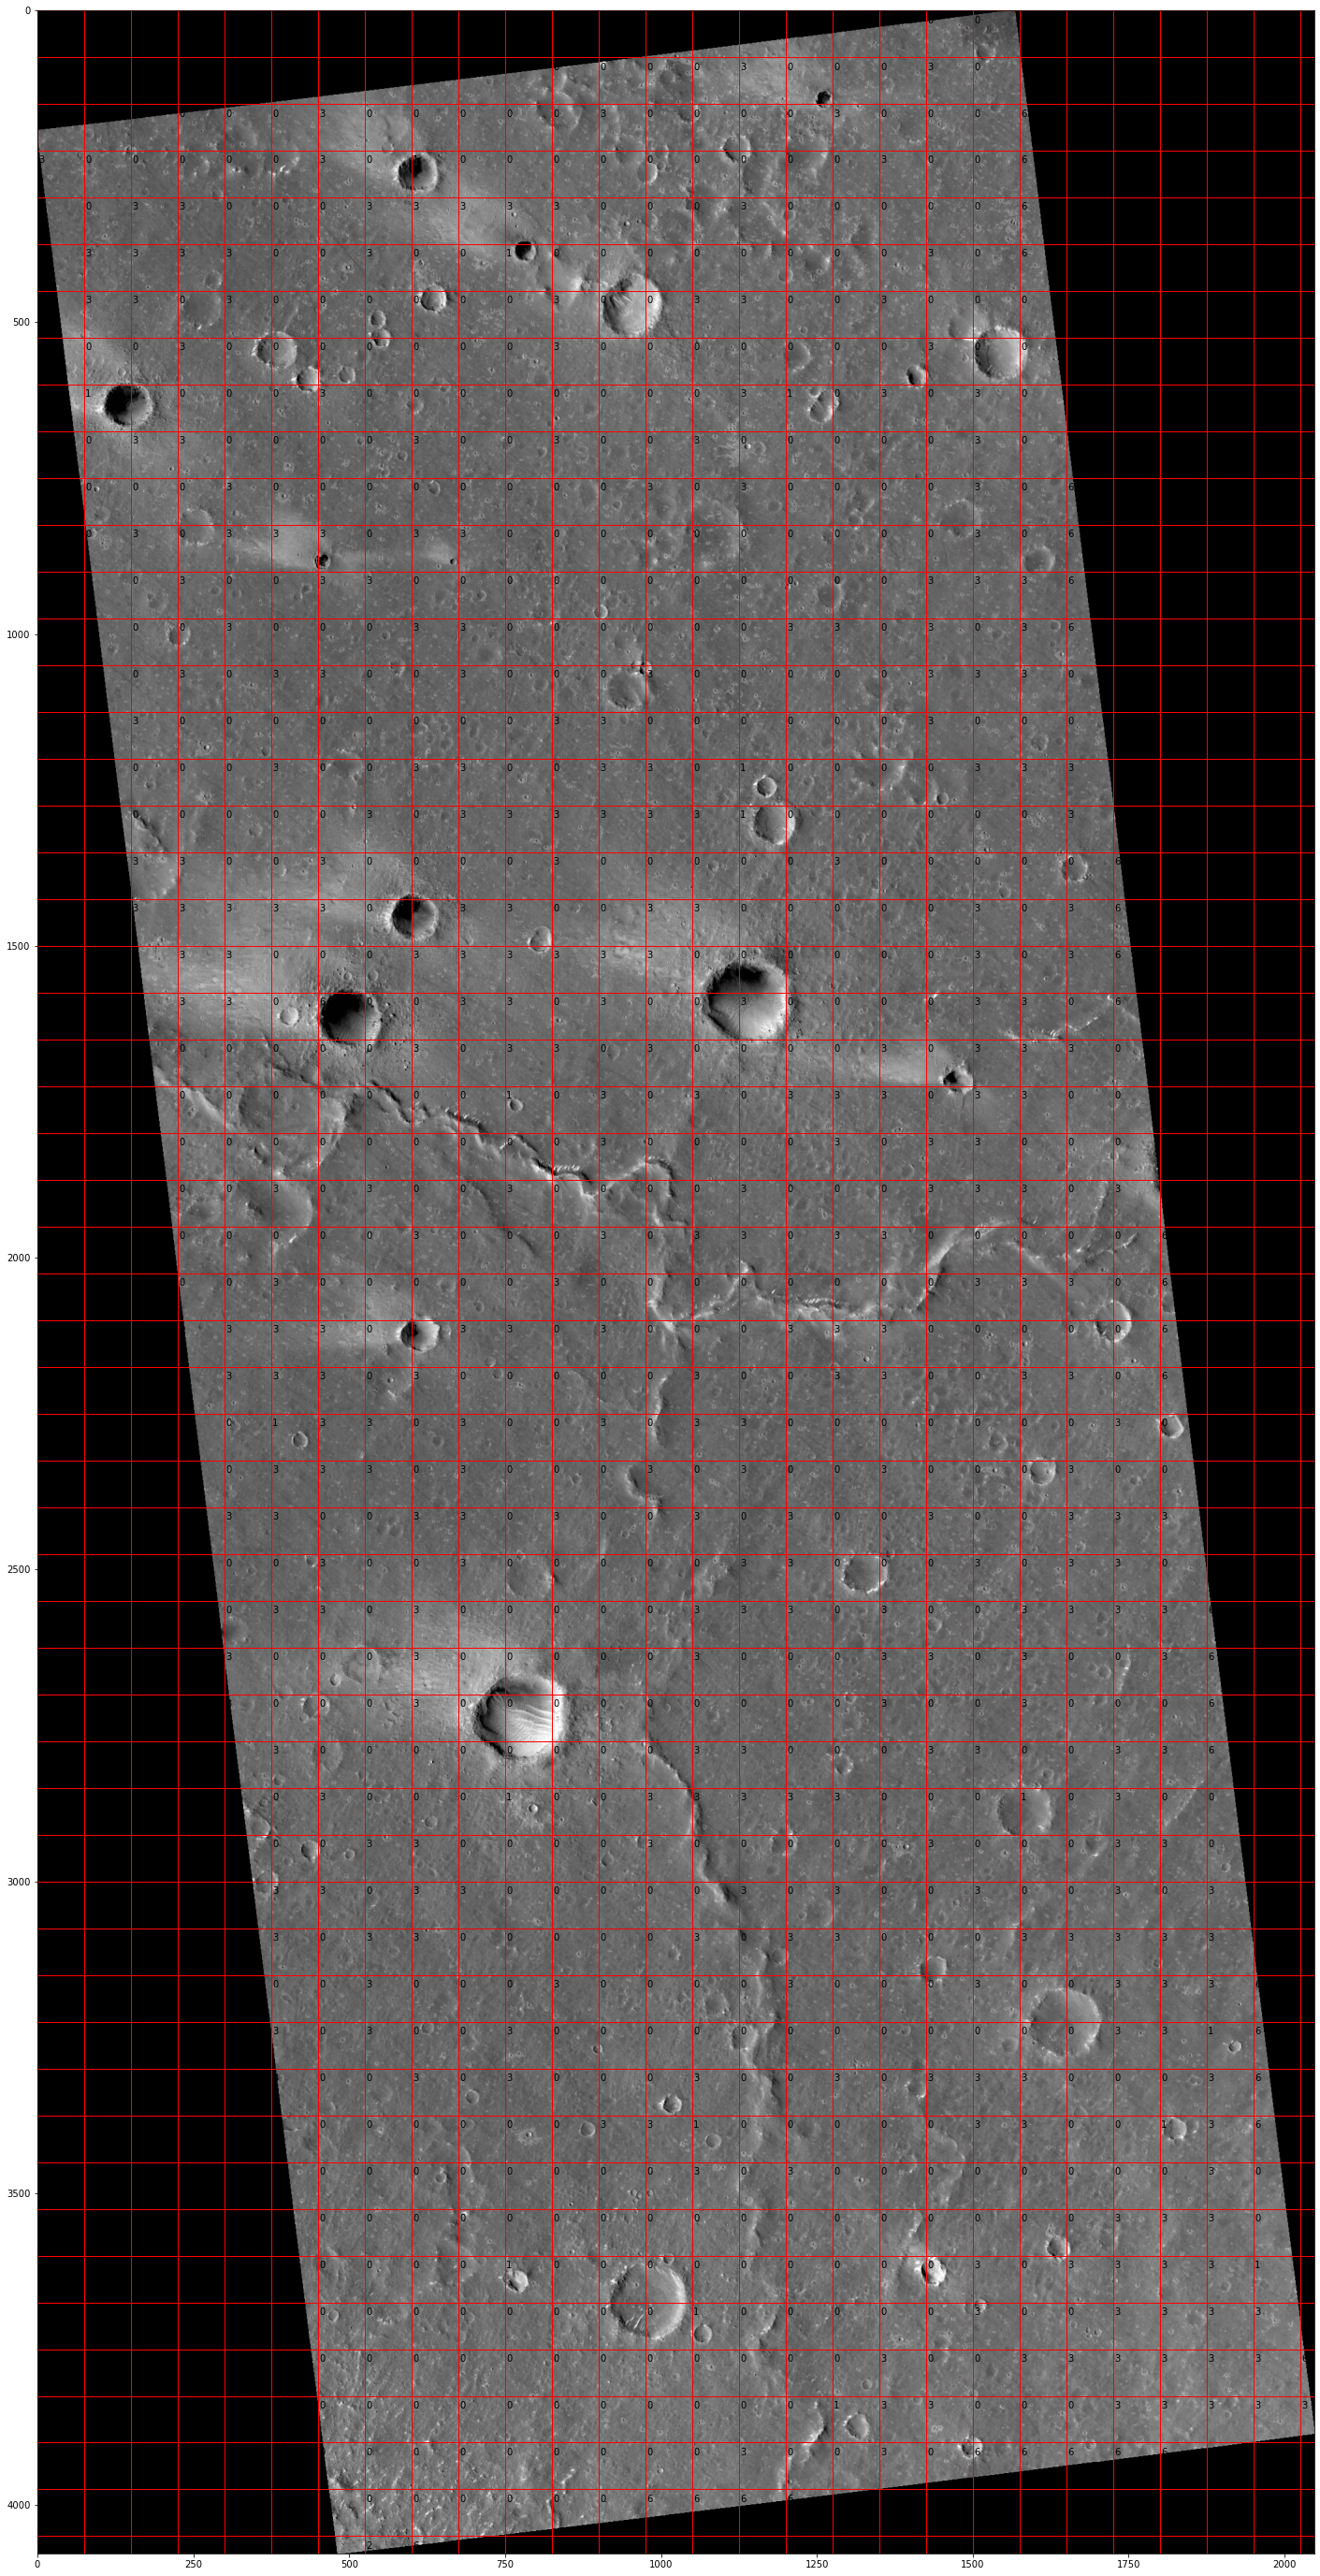

In [7]:
# Visualize the inferences.
# (We can adapt this code into the package as needed.)

import matplotlib.pyplot as plt
import matplotlib.patches as patches

window_length = global_df.loc[0]["window_length"]
window_height  = global_df.loc[0]["window_height"]
coord_tuples = list(zip(window_df["coord_x"], window_df["coord_y"]))
coord_tuples, window_length, window_height
inferences = list(window_df["prediction"])
# Create figure and axes



fig, ax = plt.subplots()
fig.set_size_inches(50, 50)
ax.imshow(cv2.imread("PIA24470_fig1.jpg"))
for i in range(len(coord_tuples)):
    rect = patches.Rectangle(coord_tuples[i], window_length, window_height,  
                             linewidth=1, edgecolor='r', facecolor='none')
    ax.annotate(inferences[i], (coord_tuples[i][0] + 2, 
                          coord_tuples[i][1] + 20))
    
    ax.add_patch(rect)

In [3]:
c.close()

NameError: name 'c' is not defined

In [7]:
shapes = [(24, 24, 3), (25, 10, 3)]
unzipped = list(zip(*shapes))
max(unzipped[0]), max(unzipped[1])

(25, 24)